# 4.10 Part 1.
## Table of Contents
### 1. Importation of Libraries and orders, products, and customer data
### 2. Considering security implications and addressing
### 3. Comparing and contrasting customers based on region 
### 4. Creating exlusion flag for low-acivity customers and exporting sample
### 5. Create profiles based on customer variables indicating 'Single adult' or 'Young parent'
### 6. Create visualization based on aformentioned profiles
### 7. Aggregate mean, min, and max on a customer profile level
### 8. Compare customer profiles with regions and departments
### 9. Producing charts supporting evidence

# Importing libraries and creating path

In [3]:
#import libraries, create pathname
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path=r'/Users/evancarr/Desktop/CF Exercises/Instacart Basket Analysis'


# Question 1 

In [5]:
ords_prods_all= pd.read_pickle(r'/Users/evancarr/Desktop/CF Exercises/Instacart Basket Analysis/02 Data/Prepared Data/ETC_4.9_part_2.pkl')

In [6]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,customer_freq_flag,first_name,last_name,gender,state,age,date_joined,dependants,marriage_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [7]:
ords_prods_all.shape

(32433030, 32)

In [8]:
# removing column limitations
pd.options.display.max_columns = None

In [9]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,first_name,last_name,gender,state,age,date_joined,dependants,marriage_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


# Question 2- Security 
### When looking for PII we see that the customers first and last name is listed. 
    This PII should be removed to uphold privacy implications

In [11]:
#Removing name columns
ords_prods_all.drop(columns=['first_name','last_name'], inplace=True)

In [12]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [13]:
ords_prods_all.shape

(32433030, 30)

# Question 3: Creating region based on states

## Northeast Region

In [16]:
ords_prods_all.loc[ords_prods_all['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'

## Midwest Region

In [18]:
ords_prods_all.loc[ords_prods_all['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest'

## South Region

In [20]:
ords_prods_all.loc[ords_prods_all['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'

## West Region

In [22]:
ords_prods_all.loc[ords_prods_all['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'

In [23]:
ords_prods_all['region'].value_counts(dropna= False)

region
South        10801195
West          8300141
Midwest       7603550
Northeast     5728144
Name: count, dtype: int64

In [24]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


# Question 4:
### Low activity customer exclusion flags

In [26]:
#creating spending flag
ords_prods_all.loc[ords_prods_all['max_order'] <10, 'exclusion flag'] = 'Low activity'
ords_prods_all.loc[ords_prods_all['max_order'] >=10, 'exclusion flag']= 'High activity'

In [27]:
ords_prods_all['exclusion flag'].value_counts(dropna=False)

exclusion flag
High activity    26957671
Low activity      5475359
Name: count, dtype: int64

In [28]:
#creating an exclusion DF based on low activity spenders
cust_excluded= ords_prods_all[ords_prods_all['exclusion flag']=='Low activity']

In [29]:
#creating a DF based off high activity customers
cust_not_excluded= ords_prods_all[ords_prods_all['exclusion flag']=='High activity']

In [30]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


In [31]:
cust_excluded.shape

(5475359, 32)

In [32]:
cust_not_excluded.shape

(26957671, 32)

In [33]:
#checking if the lenght of the sum of both separate datasets is equal to the original size
len(cust_excluded) + len (cust_not_excluded) == len(ords_prods_all)

True

### Exporting the not excluded DF

In [35]:
cust_not_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data','4.10 ords_prods_not_excluded.pkl'))

# Question 5:
## Customer Profiling

In [37]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


In [38]:
#Creating Low, Middle, High Income categories
cust_not_excluded.loc[cust_not_excluded['income'] < 50000,'income_type'] = 'Low'
cust_not_excluded.loc[(cust_not_excluded['income'] >= 50000) & (cust_not_excluded['income']< 100000),'income_type'] = 'Middle'
cust_not_excluded.loc[cust_not_excluded['income']>= 100000,'income_type'] = 'High'

/var/folders/z7/kqs18yh15zq9sxssld03yyvh0000gn/T/ipykernel_42383/2276326721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_not_excluded.loc[cust_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [39]:
#checking value counts
cust_not_excluded['income_type'].value_counts(dropna=False)

income_type
High      12425926
Middle    11699766
Low        2831979
Name: count, dtype: int64

In [40]:
# Creating Young adult, Middle aged & Senior age categories
cust_not_excluded.loc[cust_not_excluded['age']< 40,'age_type'] = 'Young Adult'
cust_not_excluded.loc[(cust_not_excluded['age'] >= 40) & (cust_not_excluded['age']< 65),'age_type'] = 'Middle Aged'
cust_not_excluded.loc[cust_not_excluded['age']>= 65,'age_type'] = 'Senior'

/var/folders/z7/kqs18yh15zq9sxssld03yyvh0000gn/T/ipykernel_42383/2192760358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_not_excluded.loc[cust_not_excluded['age']< 40,'age_type'] = 'Young Adult'


In [41]:
#checking value counts
cust_not_excluded['age_type'].value_counts(dropna=False)


age_type
Middle Aged    10530617
Young Adult     9297850
Senior          7129204
Name: count, dtype: int64

In [42]:
#Creating category based on dependants
cust_not_excluded.loc[cust_not_excluded['dependants']==0, 'dependant_type']= 'No dependants'
cust_not_excluded.loc[cust_not_excluded['dependants']>0, 'dependant_type']= 'Has dependants'

/var/folders/z7/kqs18yh15zq9sxssld03yyvh0000gn/T/ipykernel_42383/2823952387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_not_excluded.loc[cust_not_excluded['dependants']==0, 'dependant_type']= 'No dependants'


In [43]:
#checking value counts
cust_not_excluded['dependant_type'].value_counts(dropna=False)

dependant_type
Has dependants    20219205
No dependants      6738466
Name: count, dtype: int64

In [44]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants


In [45]:
cust_not_excluded['marriage_status'].value_counts(dropna=False)

marriage_status
married                             18923065
single                               4429737
divorced/widowed                     2308729
living with parents and siblings     1296140
Name: count, dtype: int64

In [46]:
#creating profiles: singles
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Young Parent'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Middle-Aged Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Middle-Aged Parent'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Senior Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Senior Parent'

/var/folders/z7/kqs18yh15zq9sxssld03yyvh0000gn/T/ipykernel_42383/240411613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['marriage_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'


In [47]:
#creating profiles: married
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Young Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Young Parent'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Middle-Aged Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Middle-Aged Parent'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'No dependants') & (cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Senior Adult'
cust_not_excluded.loc[(cust_not_excluded['dependant_type'] == 'Has dependants') & (cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['marriage_status'] == 'married'),'age_dependants_type'] = 'Married Senior Parent'

In [48]:
cust_not_excluded['age_dependants_type'].value_counts(dropna=False)

age_dependants_type
Married Middle-Aged Parent    7859955
Married Young Parent          5692883
Married Senior Parent         5370227
Single Middle-Aged Adult      2670662
Single Young Adult            2308827
Single Senior Adult           1758977
Single Young Parent           1296140
Name: count, dtype: int64

# Question 6: Visualization of distribution

Text(0.5, 0, 'User Count')

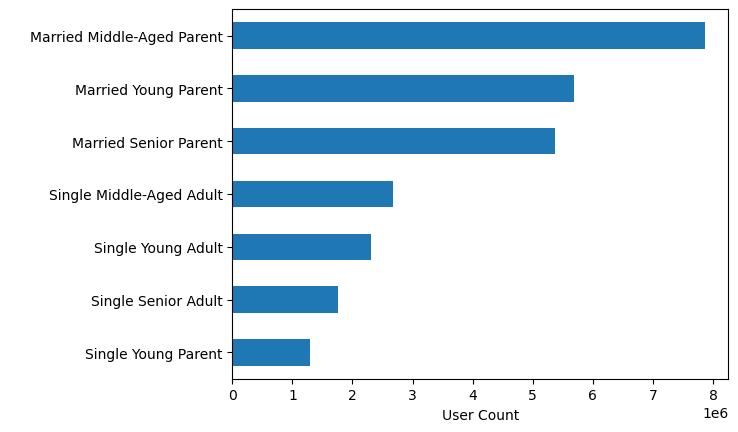

In [50]:
cust_demograph=cust_not_excluded['age_dependants_type'].value_counts(dropna= False).sort_values(ascending= True).plot.barh()
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')

#### Saving figure

In [52]:
cust_demograph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_demograph.png'))

# Question 7: Aggregation of Min, Max, & Mean on customer level

In [54]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type,age_dependants_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent


### Customer expenditure 

In [56]:
cust_not_excluded.dtypes

product_id                    int32
product_name                 object
aisle_id                       int8
department_id                  int8
prices                      float32
order_id                      int64
user_id                      object
order_number                   int8
orders_day_of_week             int8
order_hour_of_day              int8
days_since_prior_order      float16
add_to_cart_order           float64
reordered                  category
_merge                     category
price_range_loc              object
volume_days                  object
busiest_period_of_day        object
max_order                      int8
loyalty_flag                 object
mean_product_price          float32
spending_flag                object
median_day_between_ords     float16
customer_freq_flag           object
gender                       object
state                        object
age                           int64
date_joined                  object
dependants                  

In [57]:
cust_price_profile=cust_not_excluded.groupby('age_dependants_type').agg({'prices':['mean','min','max']})
cust_price_profile

prices           
                                mean  min   max
age_dependants_type                            
Married Middle-Aged Parent  7.796059  1.0  25.0
Married Senior Parent       7.796947  1.0  25.0
Married Young Parent        7.786230  1.0  25.0
Single Middle-Aged Adult    7.793932  1.0  25.0
Single Senior Adult         7.808095  1.0  25.0
Single Young Adult          7.782434  1.0  25.0
Single Young Parent         7.804271  1.0  25.0

### Customer spending frequency

In [59]:
cust_freq_profile=cust_not_excluded.groupby('age_dependants_type').agg({'days_since_prior_order':['mean','min','max']})
cust_freq_profile

days_since_prior_order           
                                             mean  min   max
age_dependants_type                                         
Married Middle-Aged Parent               9.912147  0.0  30.0
Married Senior Parent                    9.868169  0.0  30.0
Married Young Parent                     9.892035  0.0  30.0
Single Middle-Aged Adult                 9.776157  0.0  30.0
Single Senior Adult                      9.847821  0.0  30.0
Single Young Adult                       9.966081  0.0  30.0
Single Young Parent                      9.832427  0.0  30.0

In [136]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type,age_dependants_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent


In [145]:
#creating profiles: Age/Income
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['income_type'].isin(['Low'])),'income_age_status'] ='Low Income Young Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['income_type'].isin(['Middle'])),'income_age_status'] = 'Middle Income Young Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['income_type'].isin(['High'])),'income_age_status'] = 'High Income Young Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['income_type'].isin(['Low'])),'income_age_status'] = 'Low Income Middle-Aged Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['income_type'].isin(['Middle'])),'income_age_status'] = 'Middle Income Middle-Aged Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Middle Aged') & (cust_not_excluded['income_type'].isin(['High'])),'income_age_status'] = 'High Income Middle-Aged Adult'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['income_type'].isin(['Low'])),'income_age_status'] = 'Low Income Senior'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['income_type'].isin(['Middle'])),'income_age_status'] = 'Middle Income Senior'
cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Senior') & (cust_not_excluded['income_type'].isin(['High'])),'income_age_status'] = 'High Income Senior'

/var/folders/z7/kqs18yh15zq9sxssld03yyvh0000gn/T/ipykernel_42383/595879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_not_excluded.loc[(cust_not_excluded['age_type'] =='Young Adult') & (cust_not_excluded['income_type'].isin(['Low'])),'income_age_status'] ='Low Income Young Adult'


In [147]:
cust_not_excluded['income_age_status'].value_counts()

income_age_status
Middle Income Young Adult          7597534
High Income Middle-Aged Adult      7102658
High Income Senior                 5017259
Middle Income Middle-Aged Adult    2558873
Middle Income Senior               1543359
Low Income Young Adult             1394307
Low Income Middle-Aged Adult        869086
Low Income Senior                   568586
High Income Young Adult             306009
Name: count, dtype: int64

# Question 8: Customers across regions

In [80]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type,age_dependants_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent


/Users/evancarr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


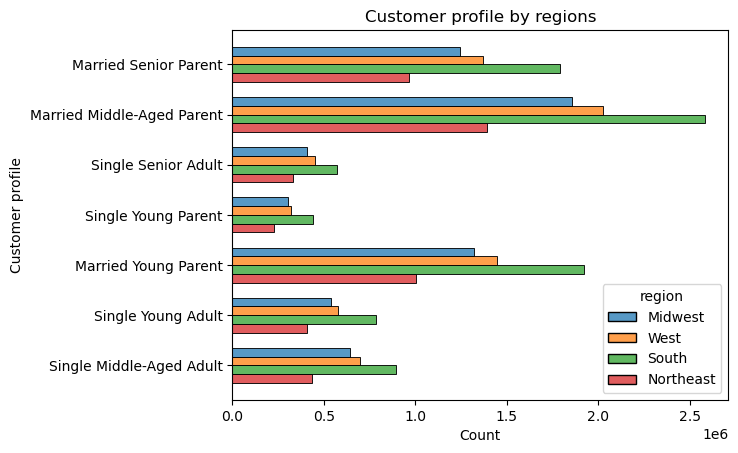

In [81]:
# Plotting histogram of customer type by region
customer_region= sns.histplot(data=cust_not_excluded,y='age_dependants_type',hue='region',multiple='dodge', shrink= .7)
plt.title('Customer profile by regions')
plt.ylabel('Customer profile')
plt.xlabel('Count')
# exporting histogrm
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Customer_region_bar.png'))

### An obvious trend becomes apparent that those who are married spend more (most likely to dual income)
### In every instance the largest spending regions are listed as
    1. South
    2. West
    3. Midwest
    4. Northeast

Text(0, 0.5, ' ')

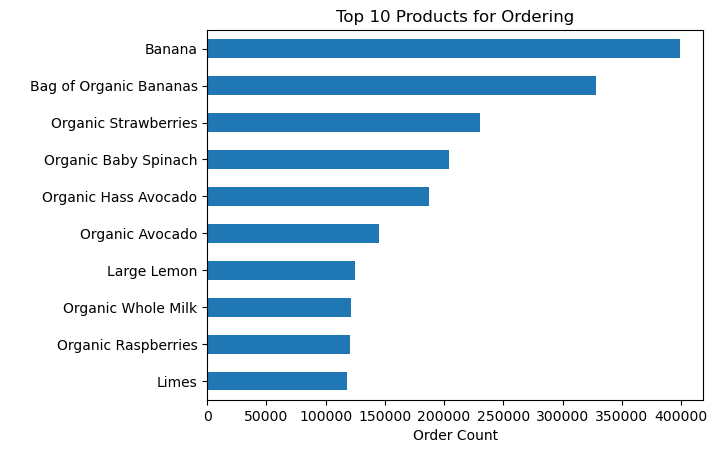

In [83]:
#Finding most popular products
favor_prod=cust_not_excluded['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh()

# Chart title
plt.title('Top 10 Products for Ordering')
# x-axis
plt.xlabel('Order Count')
# y-axis
plt.ylabel(' ')

In [84]:
#saving image
favor_prod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','favorite_product.png'))

Text(0, 0.5, 'Department ID')

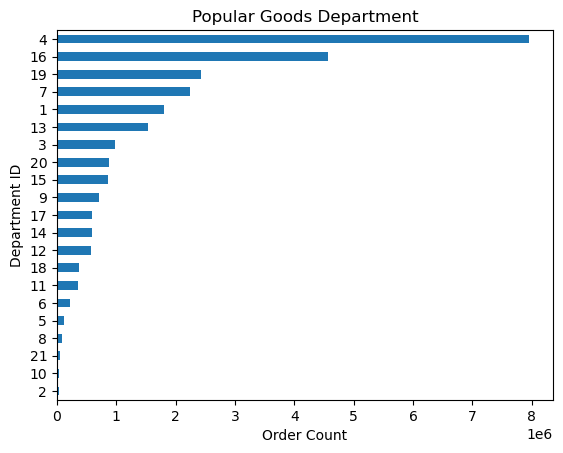

In [85]:
#Finding most popular department
favor_dept=cust_not_excluded['department_id'].value_counts(dropna=False).sort_values(ascending= True).plot.barh()
# Chart title
plt.title('Popular Goods Department') 
# Label for the x-axis
plt.xlabel('Order Count')  
# Label for the y-axis
plt.ylabel('Department ID')  

In [86]:
favor_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','favorite_dept.png'))

### Identifying departments

In [88]:
df_dep = pd.read_csv(os.path.join(path,'02 Data','Original Data','departments.csv'),index_col=False)
df_dep_t=df_dep.T
df_dep_t.reset_index()
new_header = df_dep_t.iloc[0]
df_dep_t = df_dep_t[1:]
df_dep_t.columns = new_header
df_dep_t

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


## Below list the top 5 most popular departments
    1. Produce
    2. Dairy/ Eggs
    3. Snacks
    4. Beverages
    5. Frozen

In [90]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type,age_dependants_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent


### Plotting demographic charts

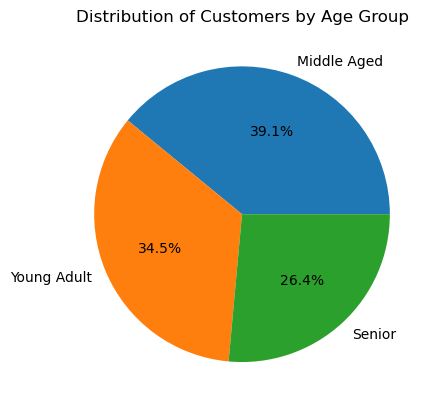

In [92]:
#customers by age pie chart
plt.pie(cust_not_excluded['age_type'].value_counts(),
        autopct='%.1f%%',
        labels = cust_not_excluded['age_type'].value_counts().index,)
plt.title('Distribution of Customers by Age Group')
#saving chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age group pie.png'), bbox_inches = 'tight')

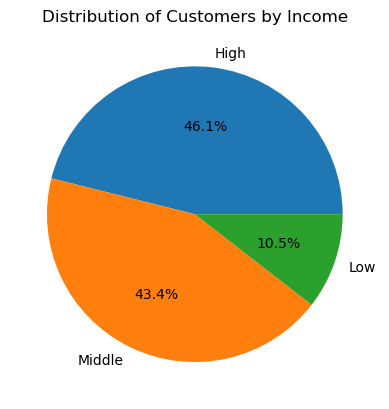

In [93]:
#customers by income pie chart
plt.pie(cust_not_excluded['income_type'].value_counts(),
        autopct='%.1f%%',
        labels = cust_not_excluded['income_type'].value_counts().index,)
plt.title('Distribution of Customers by Income')
#saving chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income group pie.png'), bbox_inches = 'tight')


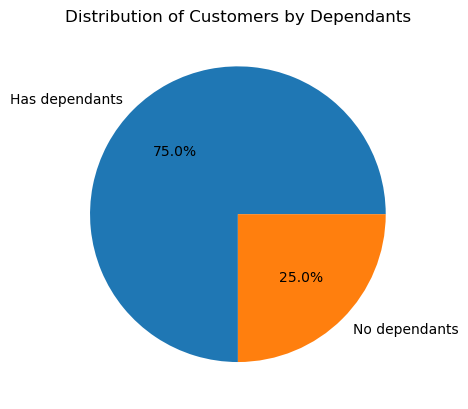

In [94]:
#customers by dependant pie chart
plt.pie(cust_not_excluded['dependant_type'].value_counts(),
        autopct='%.1f%%',
        labels = cust_not_excluded['dependant_type'].value_counts().index,)
plt.title('Distribution of Customers by Dependants')
#saving chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants pie.png'), bbox_inches = 'tight')

In [125]:
cust_not_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,volume_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_day_between_ords,customer_freq_flag,gender,state,age,date_joined,dependants,marriage_status,income,region,exclusion flag,income_type,age_type,dependant_type,age_dependants_type
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1.0,1.0,both,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,4.0,0.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1.0,1.0,both,High-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5.0,0.0,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Low,Senior,Has dependants,Married Senior Parent


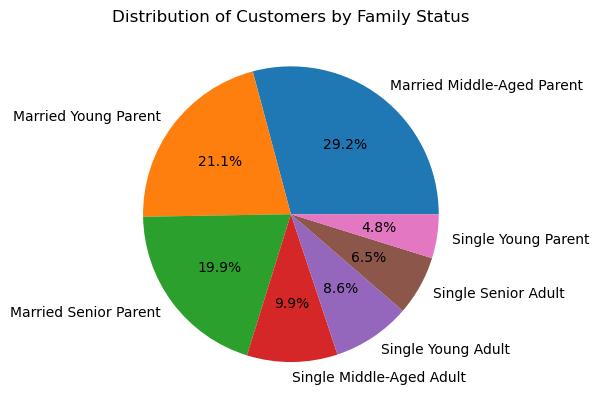

In [131]:
#customers by age dependant pie chart
plt.pie(cust_not_excluded['age_dependants_type'].value_counts(),
        autopct='%.1f%%',
        labels = cust_not_excluded['age_dependants_type'].value_counts().index,)
plt.title('Distribution of Customers by Family Status')
#saving chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Fam Status pie.png'), bbox_inches = 'tight')

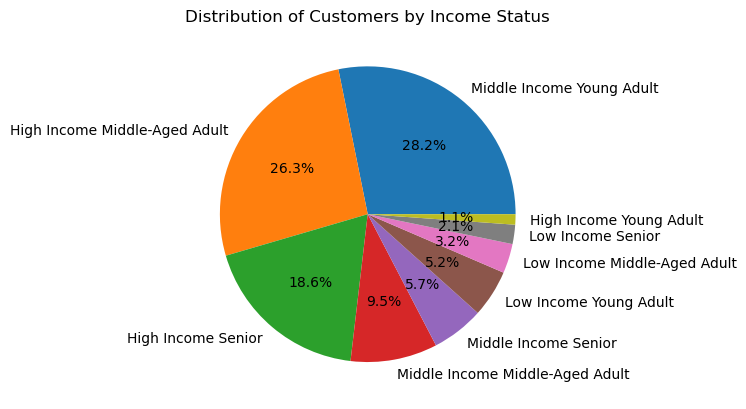

In [149]:
#customers by income age pie chart
plt.pie(cust_not_excluded['income_age_status'].value_counts(),
        autopct='%.1f%%',
        labels = cust_not_excluded['income_age_status'].value_counts().index,)
plt.title('Distribution of Customers by Income Status')
#saving chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income Status pie.png'), bbox_inches = 'tight')

# Exporting Notebook

In [100]:
cust_not_excluded.to_pickle(os.path.join(path,'02 Data','Prepared Data','ETC 4.10 final project part 1.pkl')